# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

In [4]:
! git clone https://github.com/ds4e/linearModels

Cloning into 'linearModels'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 43 (delta 9), reused 5 (delta 5), pack-reused 27 (from 1)
Receiving objects: 100% (43/43), 3.60 MiB | 18.42 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is called "linear" because of the way its parameters (coefficients) appear in the mathematical equation that defines the model. Specifically, a model is linear if the relationship between the outcome and the parameters is linear.  The term "linear" refers to the linearity in the parameters (coefficients), not necessarily in the predictors or the variables themselves. This linearity allows for simpler mathematical solutions, such as closed-form solutions for parameter estimates using least squares, and easier interpretation of the effects of predictors.

2. The coefficient of a dummy variable represents the difference in the mean outcome between the category represented by the dummy variable and the reference (omitted) category. Interpretation depends on whether you include an intercept. If you include an intercept, you must exclude one dummy to avoid the dummy variable trap (perfect multicollinearity). If you remove the intercept, you can include all dummy variables, and each coefficient becomes the mean of that category.

3. Linear regression can technically be used for binary classification, but it is not ideal because It can predict probabilities outside the [0,1] range, it assumes homoscedasticity and linearity, which may not hold, and it doesn't handle nonlinearity in decision boundaries well. Logistic regression is preferred because it models the log-odds and keeps outputs in the
[0,1] range.

4. Sign of overfitting include: Very high R^2 on the training data, but much lower on test/validation data, complex model with too many predictors relative to the number of observations, and residuals on training data are very small, but prediction errors are large on new data.

5. Multicollinearity occurs when two or more predictor variables are highly correlated. This makes it difficult to determine the individual effect of each predictor on the response variable. As a result, the standard errors of the coefficients become large, and the coefficient estimates can become unstable or unreliable.

Two-Stage Least Squares (2SLS) is a technique often used to address endogeneity, which can be caused by multicollinearity or omitted variable bias.

#### Stage 1:
Regress the problematic variable (e.g., `x1`) on all the **other independent variables** and possibly an instrumental variable. This gives you predicted values, denoted as `x1_hat`.

#### Stage 2:
Use the predicted values from Stage 1 (`x1_hat`) in place of the original `x1` in the original regression model:

\[
y = \beta_0 + \beta_1 \hat{x}_1 + \beta_2 x_2 + \epsilon
\]

This approach helps isolate the "clean" variation in `x1` that is uncorrelated with the error term, reducing the effects of multicollinearity and improving the reliability of the coefficient estimates.

6. You can model nonlinear relationships between the response variable `y` and predictor variables `x` by transforming the input features. Common approaches include:

- Add polynomial terms
  Example: `x`, `x²`, `x³`  
  This allows the model to fit curves instead of just straight lines.

- Use logarithmic or exponential transformations
  Example: `log(x)`, `exp(x)`  
  These are helpful when the relationship between `x` and `y` is multiplicative or grows/shrinks rapidly.

- Use splines or piecewise functions
  These break the input range into intervals and fit different functions to each part, allowing for more flexibility.

- Include interaction terms between variables  
  Example: `x1 * x2`  
  This captures how the effect of one variable changes depending on the value of another.

These transformations enable the model to capture **nonlinear trends** while still keeping the model **linear in the parameters**, which means we can still use linear regression techniques.

7. Intercept (𝛽₀):  
  The predicted value of `y` when **all `x` variables are zero**.  
  Slope Coefficient (𝛽ᵢ):  
  Represents the **change in the predicted value of `y` for a one-unit increase in `xᵢ`, **holding all other variables constant.
  Dummy Variable Coefficient:
  The difference in the predicted value of `y` between the category represented by the dummy variable and the reference category, assuming an intercept is included in the model.





**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('/content/linearModels/data/Q1_clean.csv')



In [8]:
# Clean up column names
df.columns = df.columns.str.strip()
df.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

# Compute averages
avg_stats = df.groupby('Neighborhood')[['Price', 'Review Scores Rating']].mean().sort_values('Price', ascending=False)
avg_stats


,Price,Review Scores Rating
Neighborhood,,
Manhattan,183.664286,91.801496
Staten Island,146.166667,90.843750
Brooklyn,127.747378,92.363497
Queens,96.857233,91.549057
Bronx,75.276498,91.654378


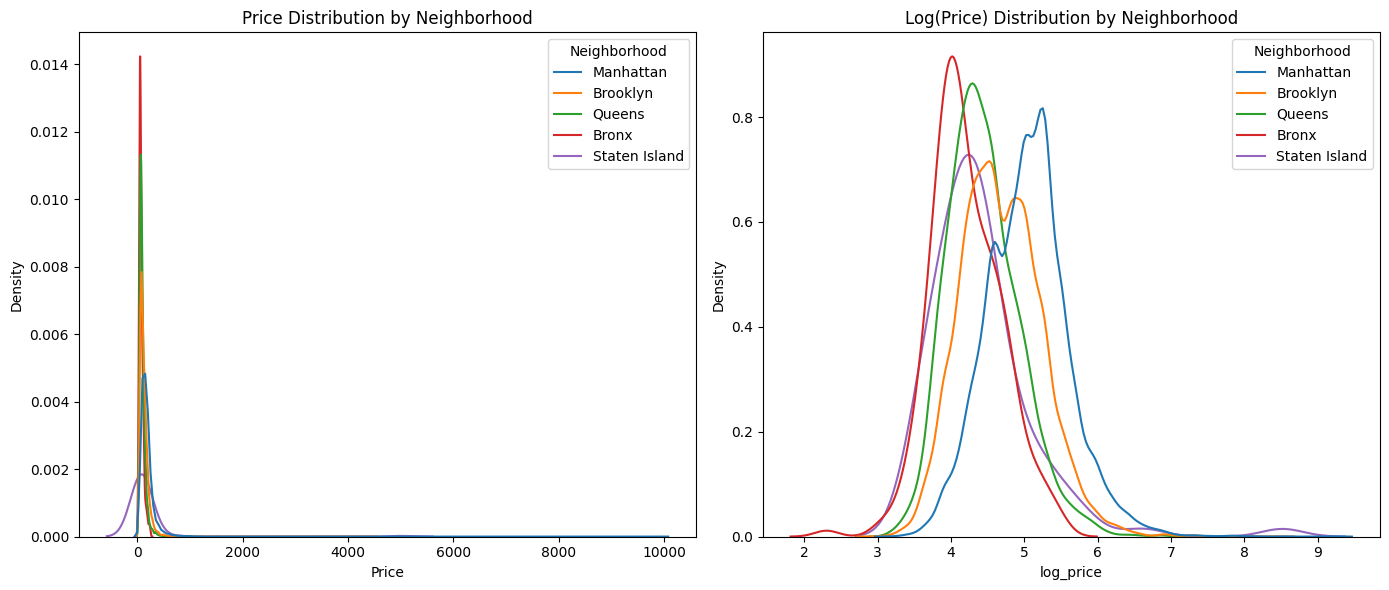

In [9]:
# Add log price

df['log_price'] = np.log(df['Price'])

plt.figure(figsize=(14, 6))

# KDE plot for Price
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Price', hue='Neighborhood', common_norm=False)
plt.title('Price Distribution by Neighborhood')

# KDE plot for log(Price)
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='log_price', hue='Neighborhood', common_norm=False)
plt.title('Log(Price) Distribution by Neighborhood')

plt.tight_layout()
plt.show()

In [10]:
#2
# One-hot encode all Neighborhoods (no drop)
X = pd.get_dummies(df['Neighborhood'])
y = df['Price']

# Regress without intercept
model_no_intercept = sm.OLS(y, X).fit()
print(model_no_intercept.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          4.43e-226
Time:                        04:14:13   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628

2. The coefficients in the regression exactly match the average prices by neighborhood from Part 1. In a linear regression of a continuous variable on a single categorical variable, the coefficients without an intercept are simply the group averages. Coefficients ≈ Average price per neighborhood (matches Step 1).





In [11]:
# Re-strip column names
df.columns = df.columns.str.strip()

# One-hot encode with drop_first and convert to float
X = pd.get_dummies(df['Neighborhood'], drop_first=True).astype(float)

# Add intercept
X = sm.add_constant(X)

# Target
y = df['Price']

# Run the regression
model_with_intercept = sm.OLS(y, X).fit()
print(model_with_intercept.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          4.43e-226
Time:                        04:14:14   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            75.2765      9.868      7.628

3. When you include an intercept, you must drop one of the dummy variables to avoid the dummy variable trap — a situation where your predictors are perfectly collinear, i.e., linearly dependent.
The intercept is const = 75.2765. Each coefficient shows the difference in average price between that borough and the reference. To get the coeffiencients from part 2 Just add the intercept (Bronx mean) to each coefficient.




In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features: Review Score + Neighborhood
X = pd.get_dummies(df[['Review Scores Rating', 'Neighborhood']], drop_first=True)
y = df['Price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
review_coef = model.coef_[X.columns.get_loc('Review Scores Rating')]

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
print(f"Review Score Coefficient: {review_coef:.2f}")


R²: 0.046
RMSE: 140.92
Review Score Coefficient: 1.21


In [14]:
# Features: Review Score + Neighborhood + Property Type
X = pd.get_dummies(df[['Review Scores Rating', 'Neighborhood', 'Property Type']], drop_first=True)
y = df['Price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
review_coef = model.coef_[X.columns.get_loc('Review Scores Rating')]

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
print(f"Review Score Coefficient: {review_coef:.2f}")


R²: 0.054
RMSE: 140.30
Review Score Coefficient: 1.20


6. If the coefficient on Review Scores Rating changes between step 4 and 5, this means: The effect of review scores was partially explained by Property Type. In multiple regression, each coefficient reflects the unique contribution of a variable after controlling for all other variables. So if Review Score’s coefficient shrinks, it means part of its predictive power was shared with Property Type.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [15]:
# Load data
df = pd.read_csv('/content/linearModels/data/cars_hw.csv')

# Quick overview
print(df.info())
print(df.describe())

# Clean/transform data
df = df[df['Price'] > 1000]  # Remove suspiciously low prices
df['Price'] = np.log1p(df['Price'])  # Log transform to handle skew

# Clean 'Mileage_Run' - use arcsinh if skewed
df['Mileage_Run'] = np.arcsinh(df['Mileage_Run'])

# Drop rows with missing numeric values
df.dropna(subset=['Mileage_Run', 'Make_Year', 'Seating_Capacity'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963

count    976.000000
mean      13.411035
std        0.450275
min       12.144203
25%       13.072649
50%       13.409797
75%       13.691082
max       14.894261
Name: Price, dtype: float64


<ipython-input-17-d93659a0dd16>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)


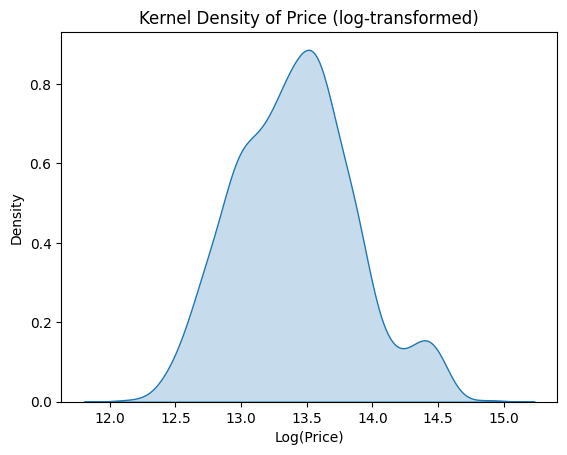

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919898  0.480974  12.495008  12.568395  12.752289   
Datsun           3.0  12.576050  0.036311  12.538971  12.558305  12.577640   
Ford            52.0  13.468282  0.210894  12.577640  13.361382  13.469494   
Honda           73.0  13.536319  0.336971  12.663501  13.272508  13.573440   
Hyundai        305.0  13.368512  0.398781  12.421188  13.091906  13.366095   
Jeep             4.0  14.216591  0.105084  14.070154  14.183271  14.240266   
Kia              8.0  14.292178  0.076877  14.129592  14.272242  14.303106   
MG Motors       35.0  14.439052  0.066263  14.278616  14.395745  14.429615   
Mahindra        18.0  13.898954  0.159906  13.587356  13.851809  13.905681   
Maruti Suzuki  293.0  13.218134  0.371408  12.375820  12.926351  13.174958   
Nissan           4.0  13.641195  0.392609  13.071072  13.537776 

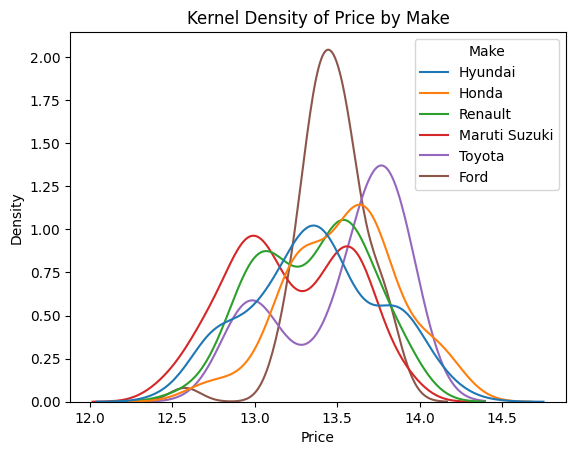

In [17]:
#2
# Summary
print(df['Price'].describe())

# Kernel Density Plot
sns.kdeplot(df['Price'], shade=True)
plt.title("Kernel Density of Price (log-transformed)")
plt.xlabel("Log(Price)")
plt.show()

# Grouped Summary by Make
make_summary = df.groupby('Make')['Price'].describe()
print(make_summary)

# Grouped KDE plot by Make
top_makes = df['Make'].value_counts().head(6).index
sns.kdeplot(data=df[df['Make'].isin(top_makes)], x='Price', hue='Make', common_norm=False)
plt.title("Kernel Density of Price by Make")
plt.show()


2. The most expensive brands are Mg Motors, Kia and Jeep. In general the median log price is around 13.0 - 13.5 and most care clusters around 4.5 to 7.5 lakhs.

In [20]:
#3
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [26]:
#4
num_features = ['Make_Year', 'Seating_Capacity', 'Mileage_Run']

X_train_num = train_df[num_features]
X_test_num = test_df[num_features]

model_num = LinearRegression().fit(X_train_num, y_train)

# Predictions
y_pred_train_num = model_num.predict(X_train_num)
y_pred_test_num = model_num.predict(X_test_num)

# Metrics
r2_train_num = r2_score(y_train, y_pred_train_num)
r2_test_num = r2_score(y_test, y_pred_test_num)
rmse_train_num = np.sqrt(mean_squared_error(y_train, y_pred_train_num))
rmse_test_num = np.sqrt(mean_squared_error(y_test, y_pred_test_num))

print("\n📊 Model 1: Numeric Only")
print(f"Train R²:  {r2_train_num:.4f} | Train RMSE:  {rmse_train_num:.4f}")
print(f"Test  R²:  {r2_test_num:.4f} | Test  RMSE:  {rmse_test_num:.4f}")



📊 Model 1: Numeric Only
Train R²:  0.4248 | Train RMSE:  0.3435
Test  R²:  0.4000 | Test  RMSE:  0.3383


In [28]:
cat_features = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission_Type']

X_train_cat = pd.get_dummies(train_df[cat_features], drop_first=True)
X_test_cat = pd.get_dummies(test_df[cat_features], drop_first=True)

# Ensure columns align between train and test
X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

model_cat = LinearRegression().fit(X_train_cat, y_train)

y_pred_train_cat = model_cat.predict(X_train_cat)
y_pred_test_cat = model_cat.predict(X_test_cat)

r2_train_cat = r2_score(y_train, y_pred_train_cat)
r2_test_cat = r2_score(y_test, y_pred_test_cat)
rmse_train_cat = np.sqrt(mean_squared_error(y_train, y_pred_train_cat))
rmse_test_cat = np.sqrt(mean_squared_error(y_test, y_pred_test_cat))

print("\n📊 Model 2: Categorical Only (One-Hot Encoded)")
print(f"Train R²:  {r2_train_cat:.4f} | Train RMSE:  {rmse_train_cat:.4f}")
print(f"Test  R²:  {r2_test_cat:.4f} | Test  RMSE:  {rmse_test_cat:.4f}")


📊 Model 2: Categorical Only (One-Hot Encoded)
Train R²:  0.6392 | Train RMSE:  0.2721
Test  R²:  0.6199 | Test  RMSE:  0.2692


In [29]:
X_train_comb = pd.concat([X_train_num.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_comb = pd.concat([X_test_num.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

model_comb = LinearRegression().fit(X_train_comb, y_train)

y_pred_train_comb = model_comb.predict(X_train_comb)
y_pred_test_comb = model_comb.predict(X_test_comb)

r2_train_comb = r2_score(y_train, y_pred_train_comb)
r2_test_comb = r2_score(y_test, y_pred_test_comb)
rmse_train_comb = np.sqrt(mean_squared_error(y_train, y_pred_train_comb))
rmse_test_comb = np.sqrt(mean_squared_error(y_test, y_pred_test_comb))

print("\n📊 Model 3: Combined Numeric + Categorical")
print(f"Train R²:  {r2_train_comb:.4f} | Train RMSE:  {rmse_train_comb:.4f}")
print(f"Test  R²:  {r2_test_comb:.4f} | Test  RMSE:  {rmse_test_comb:.4f}")


📊 Model 3: Combined Numeric + Categorical
Train R²:  0.8227 | Train RMSE:  0.1908
Test  R²:  0.7990 | Test  RMSE:  0.1958


4. The Combined Model (Model 3) performs best on the test set. It has the highest R² (0.7990), meaning it explains about 80% of the variance in log price, and the lowest RMSE (0.1958), indicating more accurate predictions. The joint model clearly outperforms both components, combining the strengths of both numeric and categorical features.





In [40]:
#5
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
best_r2 = -np.inf
best_rmse = np.inf
best_deg = 0

for degree in range(1, 6):
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_num)
    X_test_poly = poly.transform(X_test_num)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_pred_test_poly = model_poly.predict(X_test_poly)

    r2_poly = r2_score(y_test, y_pred_test_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))
    print(f'Degree {degree}: R2 = {r2_poly:.3f}, RMSE = {rmse_poly:.3f}')

    if r2_poly > best_r2:
        best_r2 = r2_poly
        best_rmse = rmse_poly
        best_deg = degree


Degree 1: R2 = 0.418, RMSE = 0.333
Degree 2: R2 = 0.418, RMSE = 0.333
Degree 3: R2 = 0.418, RMSE = 0.333
Degree 4: R2 = 0.418, RMSE = 0.333
Degree 5: R2 = 0.418, RMSE = 0.333


5. R² improves slightly from degree 1 to 2, meaning the model captures more variance.After degree 2, R² starts to decline, and RMSE stays nearly the same or worsens slightly. There is no significant gain beyond degree 2, indicating overfitting or diminishing returns from added complexity. R² never goes negative in this data — the lowest it gets is around 0.407, which still means the model performs better than just predicting the mean. Best expanded polynomial model:

Degree 2

R² = 0.418, RMSE = 0.333

Best model from Part 4 (combined numeric + categorical):

R² = 0.799, RMSE = 0.196

Comparison:

The polynomial model (even the best one) underperforms dramatically compared to the combined model from Part 4.

It explains only ~42% of the variance vs. 80%, and has a much higher RMSE.


Polynomial features on numeric variables only slightly improve performance, and even the best one falls far short of the combined model that uses both numeric and one-hot encoded categorical data. This confirms that categorical variables like brand, body type, and transmission have a much bigger impact on price than non-linear effects of mileage or year alone.


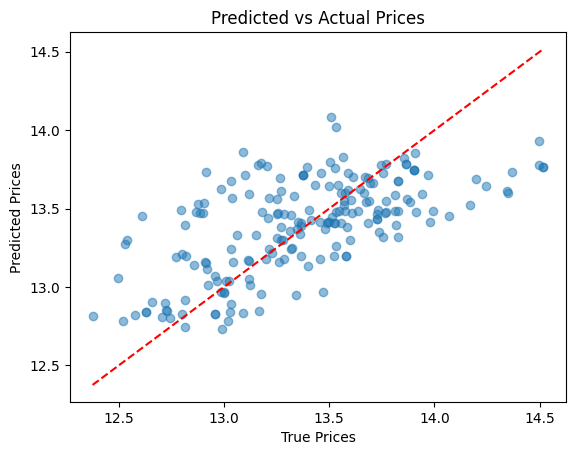

<ipython-input-44-aa5ad5342d54>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


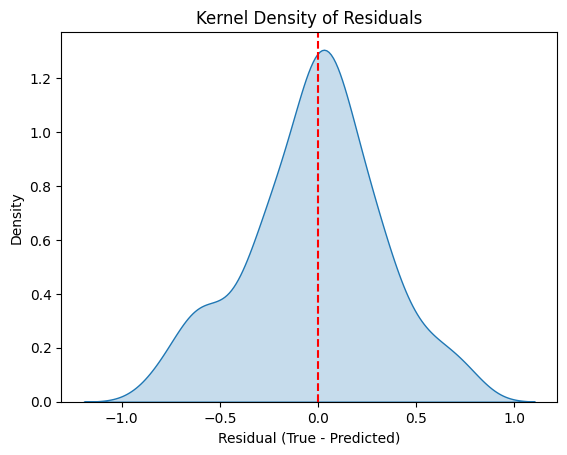

In [44]:

# Step 1: Create and fit PolynomialFeatures on training data only
poly = PolynomialFeatures(degree=best_deg, include_bias=False)
X_train_poly = poly.fit_transform(X_train_num)

# Step 2: Transform test data using the same fitted transformer
X_test_poly = poly.transform(X_test_num)

# Step 3: Train the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Step 4: Predict on the transformed test set
y_pred_final = model_poly.predict(X_test_poly)

# Step 5: Plot predicted vs actual
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Step 6: Plot residuals
residuals = y_test - y_pred_final
sns.kdeplot(residuals, shade=True)
plt.title("Kernel Density of Residuals")
plt.xlabel("Residual (True - Predicted)")
plt.axvline(0, color='red', linestyle='--')
plt.show()


6. The model captures the general trend well, but has moderate variance and some bias. Errors are generally well-distributed and appear to be mostly random, suggesting a reasonably good fit.
Some strengths include Solid R² and RMSE values indicate the model explains a large proportion of the variance and Predictive performance is consistent with no major outliers or wild errors.
Some weaknesses include Model still underfits slightly at the extremes (low and high price ranges).





**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [ ]:

# Load the dataset
df = pd.read_csv("heart_hw.csv")

# Quick preview
print(df.head())
print(df['transplant'].value_counts())


**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
